# Machine Learning in a Nutshell with scikit-learn
    
## Projections and Manifold Learning


by 

[__Michael Granitzer__ (michael.granitzer@uni-passau.de)]( http://www.mendeley.com/profiles/michael-granitzer/)

with examples taken from the scikit-learn documentation under http://scikit-learn.org/stable/


__License__

This work is licensed under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)


## Overview

**Dimensionality reduction** is the mapping of data to a lower dimensional space such that uninformative variance in the data is discarded, or such that a subspace in which the data lives is detected

**Two concepts are often applied**:

* **Geometric Projections**: Project high-dimensional data on a low dimensional surface while preserving selected properties of the data points. The projection is global, i.e. the same for all data points

    * Linear Projections
    * Non-Linear Projections
    
    
* **Manifold Learning**: Identify low-dimensional geometrical structures in high dimensional space. The projection is local, i.e. depend on the local structure of a data points.

**Two main application areas**

* Visualization of multivariate data sets or graphs
* Reducing the dimensionality of a data set for increasing the accuracy and/or the efficiency of data mining algorithms

### Examples 

The following figure shows examples for projection methods. Depending on the criteria what a *good* embedding means, different results are achieved. Top-left is the original 3D image.

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_001.png">

Note that every projection means loss of information, but sometimes it is good to loose information (e.g. noise)


### Dimensionality Reduction

Scikit learn supports a large number of different methods. Their usage is similar to clustering:

1. Instantiate the class for doing the transformation
2. Fit the model to the data
3. (Optionally) apply the data 

We will now look into a selected set of methods

## 1. PCA - Principal Component Analysis

PCA decomposes a data set in its "principal components" through a linear transformation. Principal components are orthogonal to each other and point in the direction of largest variance, i.e. the retain the most information of the data set.

Showing the direction of largest variance:

<img src="./images/pca-variance.svg">

Transforming the coorindation system in a new one along the principal components

<img src="./images/pca-transform.svg">



#### The PCA Transformation

Consits basically of 4 steps:

<img src="./images/pca-princip.svg">

The dimensionality reduction happens when not all principle components are used in the new coordinate system, i.e. only those PCs with the largest variance are kept.

There are nice visualizations (for 2D and 3D data) available at http://setosa.io/ev/principal-component-analysis/

#### PCA in scikit-learn

* Import PCA via `from sklearn.decomposition import PCA`
* Create the instance: `pca = PCA(...parameters...)
* Fit the data to create a model `model = pca.fit(data)` 
* transform data `transformed_data = model.transform(data)`
* or do both in one step `transformed_data = model.fit_transform(data)`

Under `model.explained_variance_ratio_` the ratio of variance explained for each principle component can be seen

### Exercise1: PCA on the breast cancer data set

1. Load the breast cancer data set and transform it to pandas Dataframes using the code below
2. Have a look at the data and feature correlations to get an intuition of the dataset
3. Conduct a PCA on the data and plot the two principle components with the highest variance (color code the classes using the labels provided in <code>y['malignant']</code>)
4. Plot the portion of variances in the data that each component can explain (<code>pca.explained_variance_ratio_</code>). Also plot the cumulative sum of those vaues. What do these values tell us?

#### 1. Load the breast cancer data set and transform it to pandas Dataframes using the code below

In [5]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

# necessary to not cut away columns when running out of screen
pd.set_option('display.max_columns', None)

# load the data
dataset = load_breast_cancer()
x = pd.DataFrame(StandardScaler().fit_transform(dataset.data), columns=dataset.feature_names)
y = pd.DataFrame(dataset.target, columns=['malignant'])

#### 2. Have a look at the data and feature correlations to get an intuition of the dataset

In [3]:
x.corr().style.background_gradient(cmap='coolwarm', axis=None)

#### 3. Conduct a PCA retaining the two principle components with the highest variance and plot the resulting data set and color code the classes

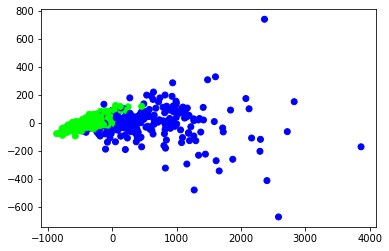

In [4]:
from sklearn.decomposition import PCA

# apply PCA
pca = PCA()
x_transformed = pca.fit_transform(x)

# plot the first two principal components
plt.scatter(x_transformed[:,0], x_transformed[:,1], c=y['malignant'], cmap=plt.cm.brg)

#### 4. Plot the portion of variances in the data that each component can explain (<code>pca.explained_variance_ratio_</code>). Also plot the cumulative sum of those vaues. What do these values tell us?

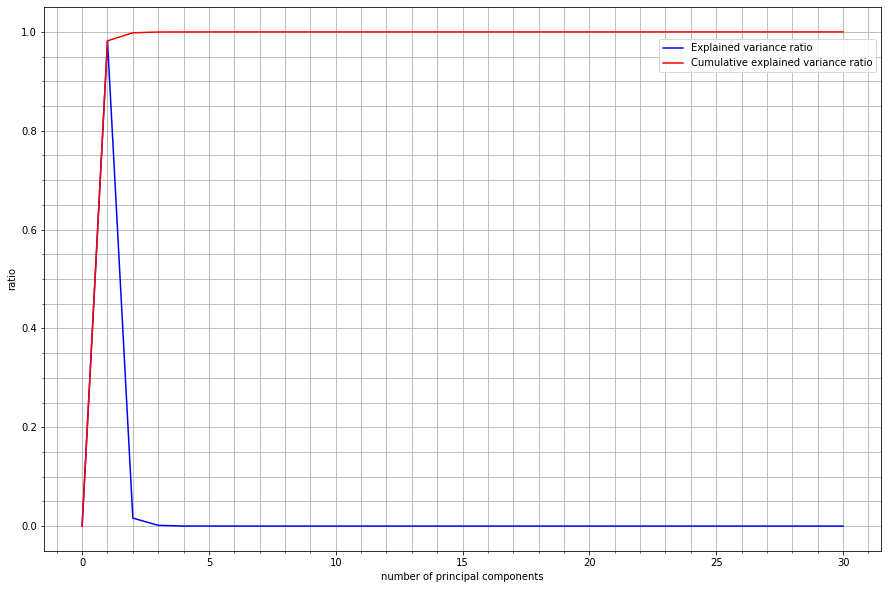

In [5]:
# How much variance is explained?
plt.figure(figsize=(15, 10))
plt.plot([0] + list(pca.explained_variance_ratio_), c='blue', label='Explained variance ratio')
plt.plot([0] + list(pca.explained_variance_ratio_.cumsum()), c='red', label='Cumulative explained variance ratio')
plt.minorticks_on()
plt.grid(which='minor')
plt.grid(which='major')
plt.gca().set_xlabel('number of principal components')
plt.gca().set_ylabel('ratio')
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.95))